The goal here is to test the code (`implement_depth_ebv_cuts.py`) that will implement depth cuts on the new cadence outputs, like those implemented for DESC-SRD forcasts (https://github.com/humnaawan/MAF-Related-Notebooks/blob/master/DESC-SRD/v1_DESC-SRD_depthCuts.ipynb ), where the cuts define the survey footprint usable for extragalactic science.

Here we test the code on `minion1016` for which we have the numbers from the DESC-SRD work. A few difference here: Random dithers are assigned here as opposed to RepRandom; same timescale of FieldPerVisit though. Also, to create the EBV skymap, the dither Stacker is used for more accuracy.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
!python implement_depth_ebv_cuts.py --help

Usage: implement_depth_ebv_cuts.py [options]

Options:
  -h, --help            show this help message and exit
  --nside=NSIDE         HEALPix resolution parameter.
  --db_path=DB_PATH     Path to OpSim db to consider.
  --coadd_data_dir=COADD_DATA_DIR
                        Path to the folder where coadd depth maps are.
  --mag_cuts=MAG_CUTS   List of depth cuts to consider
  --chosen_cuts=CHOSEN_CUTS
                        Finalized cuts: 1yr, 10yr.
  --ebv_cut             Set to True if want to implement a EBV cut (discard
                        pixels with EBV>0.2)
  --save_stuff          Set to True if want to save the plots and the readme
                        etc.
  --outDir=OUTDIR       Path to the folder where all the output should be
                        stored; directory should exist already.
  --debug               Set to True if want to debug: basically run the
                        analysis as in DESC SRD v1.


/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)



Options: {'nside': 256, 'db_path': '/global/cscratch1/sd/awan/dbs_wp_unzipped/baseline2018a.db', 'coadd_data_dir': '/global/homes/a/awan/LSST/output/coadd_output_allwps_perNight/', 'mag_cuts': '24.5, 24.7, 25.0, 25.3, 25.5, 26.0, 26.5', 'chosen_cuts': '24.5, 26.0', 'ebv_cut': False, 'save_stuff': False, 'outDir': '/global/homes/a/awan/LSST/output/', 'debug': True}
Final depth cuts to be implemented: [24.5, 26.0]

data_dir: /global/homes/a/awan/LSST/output/coadd_output_minion1016/
dbname: minion_1016_sqlite_new_dithers
nside: 256

## Reading in the data ... 

Reading ['coaddM5Data_unmasked_u_RandomDitherFieldPerVisit.npz'] from
coaddM5Analysis_nside256_withDustExtinction_0pixelRadiusForMasking_uBand_minion_1016_sqlite_new_dithers_1yearCut_directory//unmaskedCoaddData.

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Reading ['coaddM5Data_unmasked_g_RandomDitherFieldPerVisit.npz'] from
coaddM5Analysis_nside256_withDustExtinction_0pixelRadiusForMasking_gBand_m

/global/u2/a/awan/LSST/lsstRepos/ObsStrat/static/depth_cuts/implement_depth_ebv_cuts.py:117: RuntimeWarning: invalid value encountered in greater
  (data_bundle[yr_cut].metricValues.data > 0))[0]
/global/u2/a/awan/LSST/lsstRepos/ObsStrat/static/depth_cuts/implement_depth_ebv_cuts.py:153: RuntimeWarning: invalid value encountered in add
  data_bundle[key].metricValues.data[:] += delm
/global/u2/a/awan/LSST/lsstRepos/ObsStrat/static/depth_cuts/implement_depth_ebv_cuts.py:162: RuntimeWarning: invalid value encountered in greater
  (data_bundle[yr_cut].metricValues.data > 0))[0]


Median depth as read: 23.0800957734
m_wanted-m_current = 0.235571425721
Renormalized map. 
New median: 23.3156671991

## Re-calculating improvement in fluxes between 1yr and 10yrs after the renormalizing ... 
u-band: improvement factor in flux: 3.60748311562
g-band: improvement factor in flux: 3.55033074562
r-band: improvement factor in flux: 3.6480360108
i-band: improvement factor in flux: 3.57479009111
z-band: improvement factor in flux: 2.90344717016
y-band: improvement factor in flux: 2.80325978256

Wanted improvement factor over ten years: 3.16227766017
Mean improvement factor across ugrizy: 3.34789115265

#### Stats: no constraints on depth, i.e., even have negative depths
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 23.80 | 25.38 | 25.57 | 24.91 | 24.00 | 23.32 
| 5$\sigma$ Depth: Std | 2.06 | 1.85 | 1.39 | 1.10 | 0.88 | 0.66 
| Area (deg2) | 16743.54 | 18178.16 | 18189.22 | 18879.33 | 19006.28

/global/u2/a/awan/LSST/lsstRepos/ObsStrat/static/depth_cuts/implement_depth_ebv_cuts.py:243: RuntimeWarning: invalid value encountered in greater
  (data_bundle[key].metricValues.data > 0))[0]



#### Stats: considering area common to all-6 bands with depths>0 in all
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 23.85 | 25.46 | 25.66 | 25.00 | 24.04 | 23.34 
| 5$\sigma$ Depth: Std | 1.66 | 1.35 | 0.99 | 0.79 | 0.62 | 0.44 
| Area (deg2) | 16020.96 | 16020.96 | 16020.96 | 16020.96 | 16020.96 | 16020.96 

| - | 10yr_u | 10yr_g | 10yr_r | 10yr_i | 10yr_z | 10yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 25.19 | 26.75 | 26.97 | 26.29 | 25.16 | 24.44 
| 5$\sigma$ Depth: Std | 1.71 | 1.43 | 1.05 | 0.84 | 0.67 | 0.54 
| Area (deg2) | 19123.88 | 19123.88 | 19123.88 | 19123.88 | 19123.88 | 19123.88 


#### Stats: i>24.5 in area common to all six bands with depths>0 in all
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 24.09 | 25.60 | 25.80 | 25.13 | 24.13 | 23.39 
| 5$\sigma$ Depth:

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:990: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


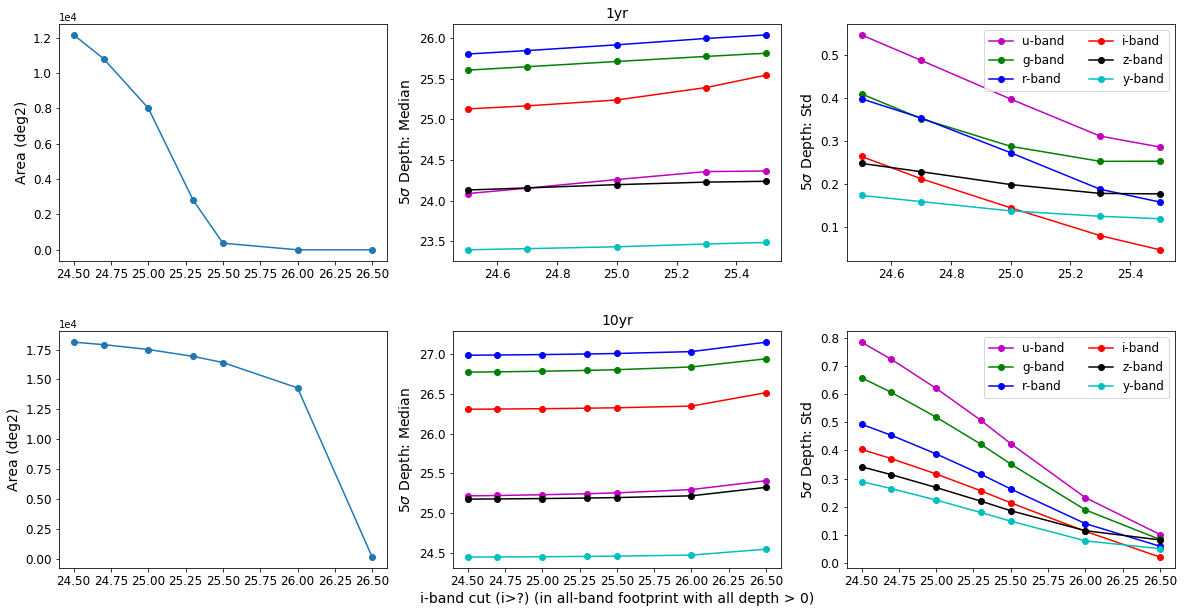


## Plotting galactic latitude and EBV histograms for mag_cuts: [24.5, 24.7, 25.0, 25.3, 25.5, 26.0, 26.5]
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


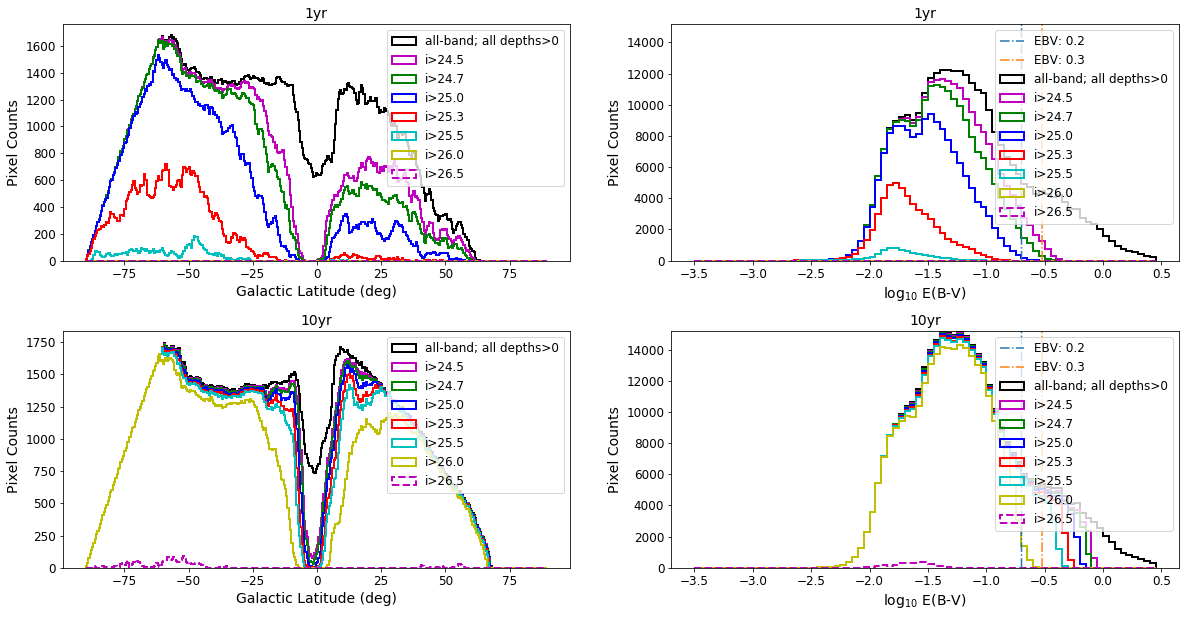

#################################################################################################################
#################################################################################################################
#################################################################################################################
#################################################################################################################
Chosen cuts: {'1yr': 24.5, '10yr': 26.0}

#### minion_1016_sqlite_new_dithers stats: RandomDitherFieldPerVisit: final cuts: {'1yr': 24.5, '10yr': 26.0} 
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 24.09 | 25.60 | 25.80 | 25.13 | 24.13 | 23.39 
| 5$\sigma$ Depth: Std | 0.55 | 0.41 | 0.40 | 0.26 | 0.25 | 0.17 
| Area (deg2) | 12164.15 | 12164.15 | 12164.15 | 12164.15 | 12164.15 | 12164.15 

| - | 10yr_u | 10yr_g | 10yr_r | 10yr_i | 10yr_z | 10yr_y 
| ----

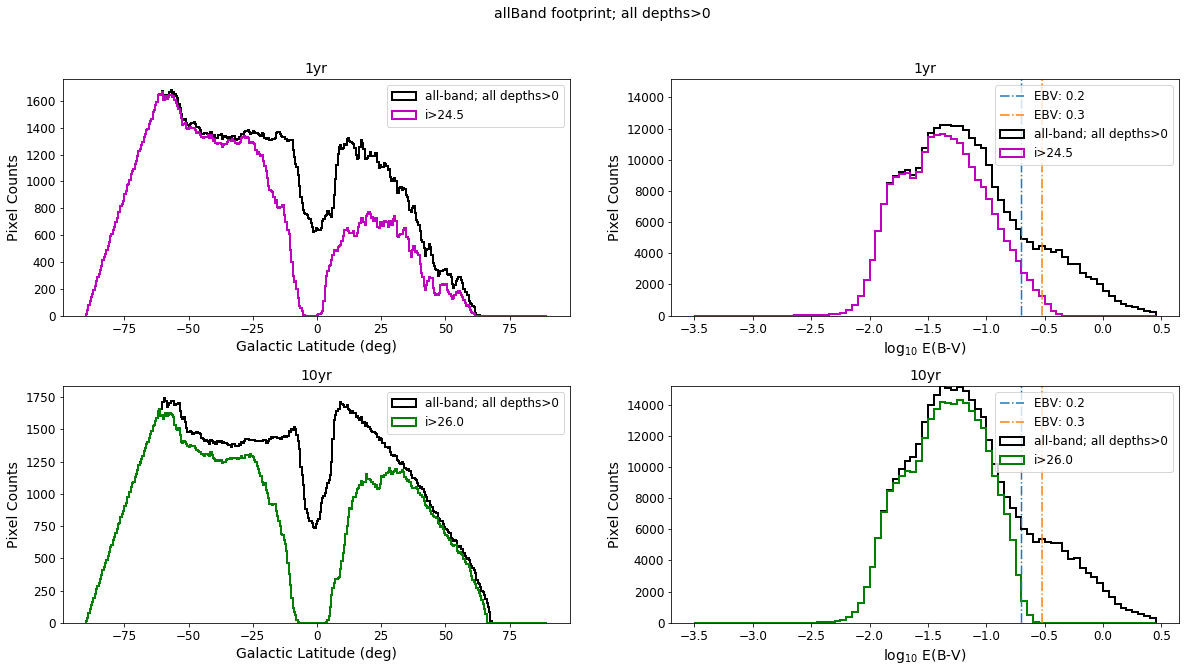

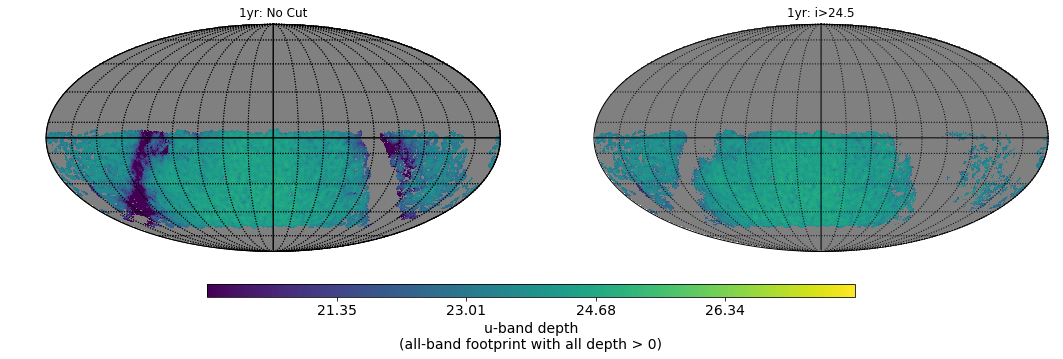

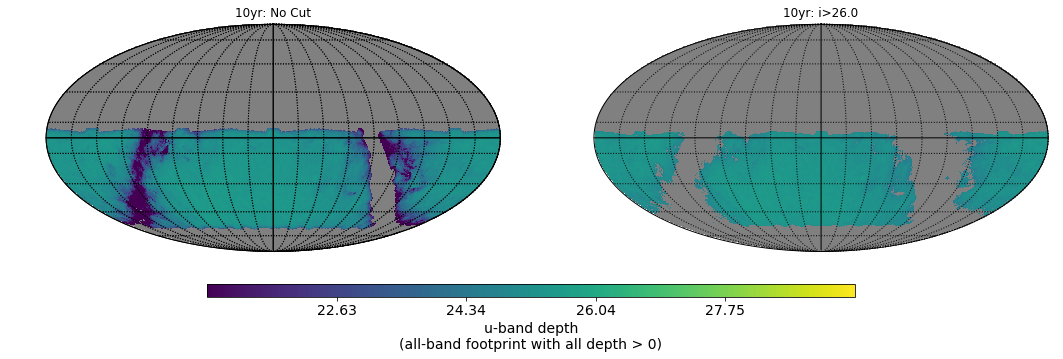

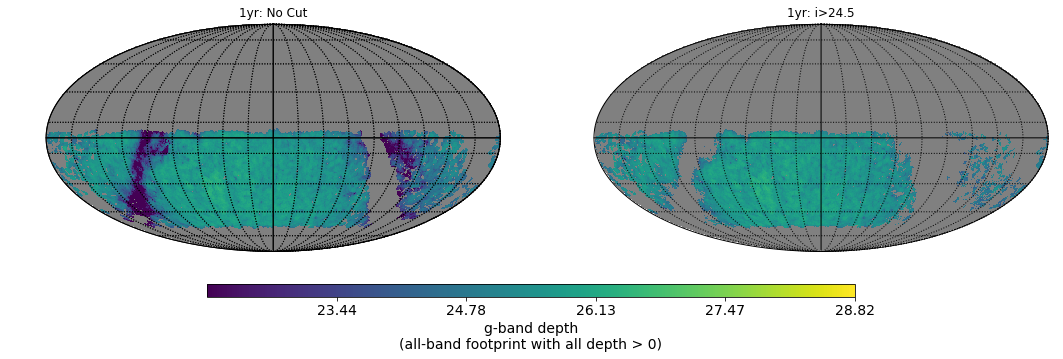

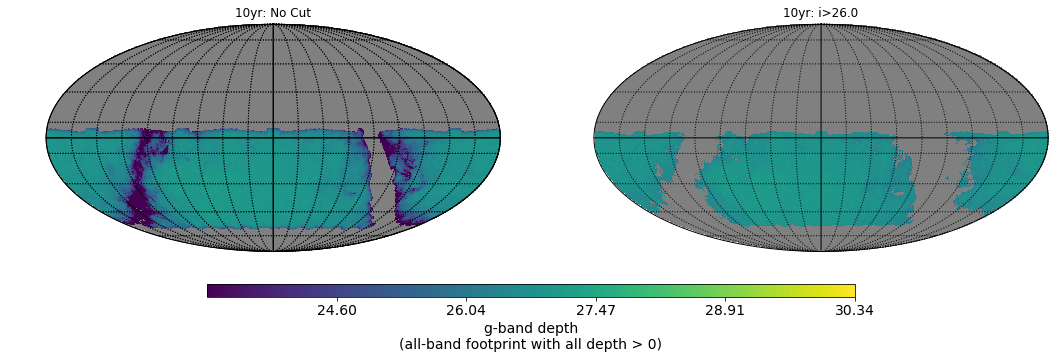

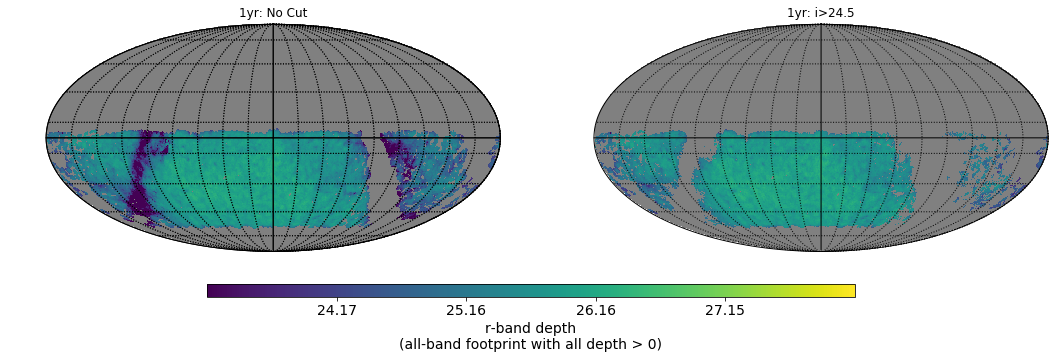

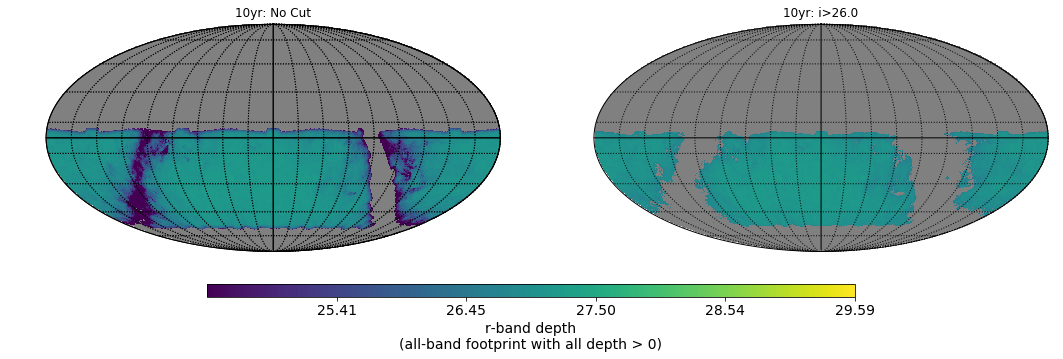

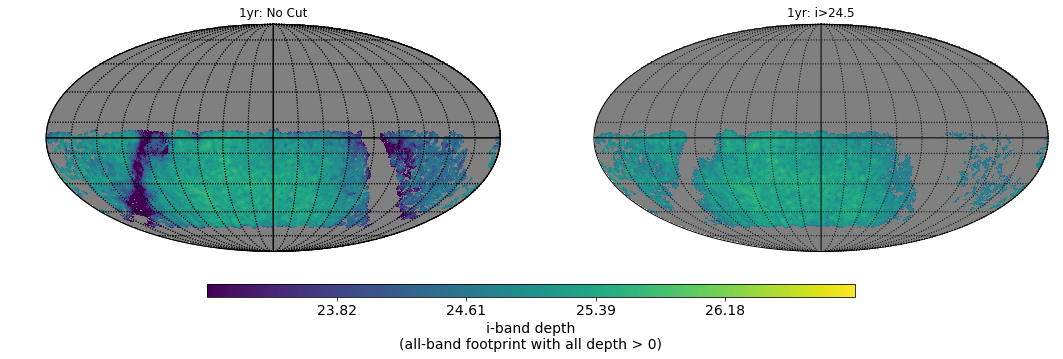

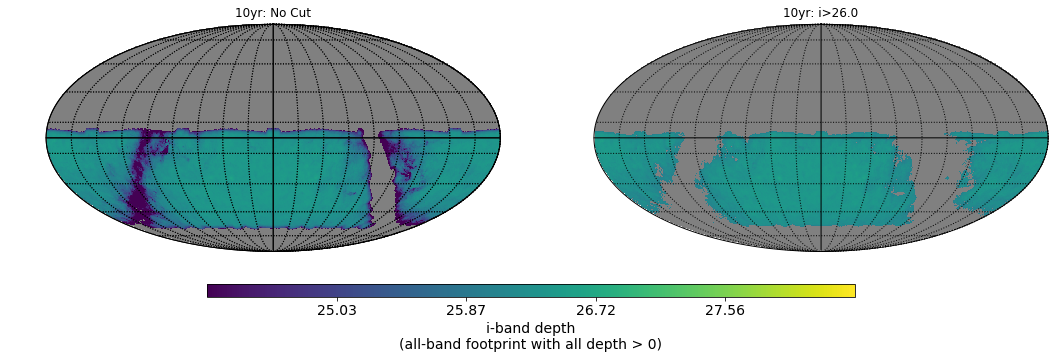

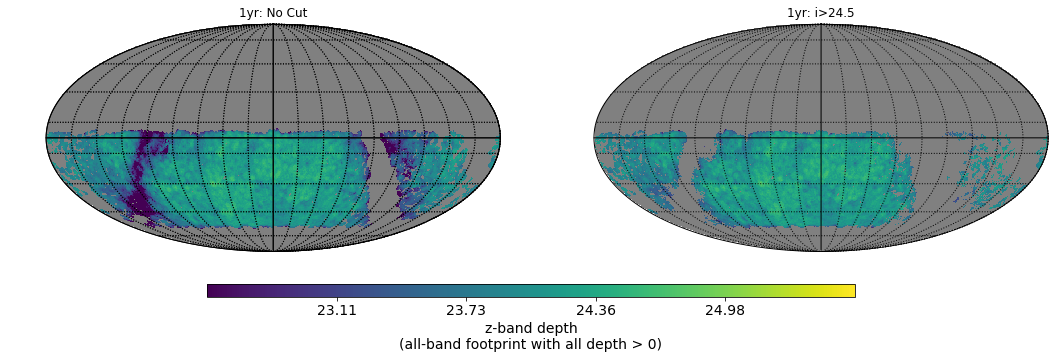

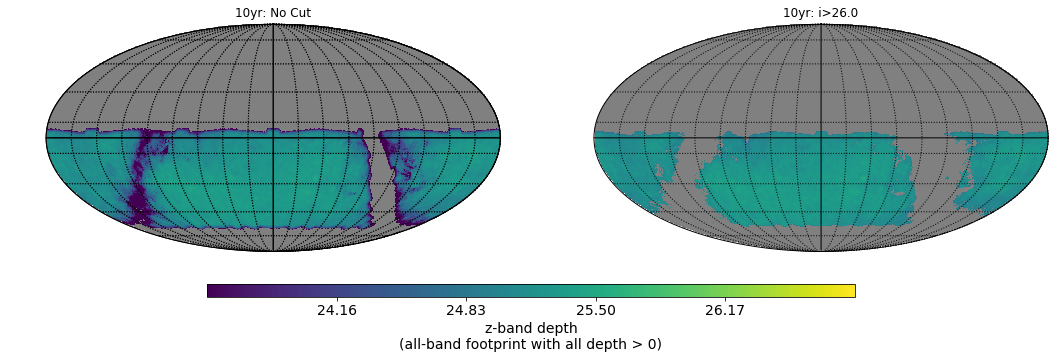

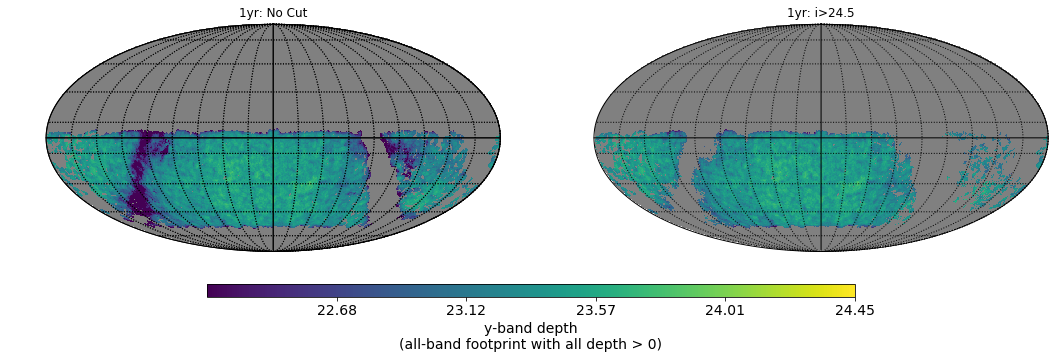

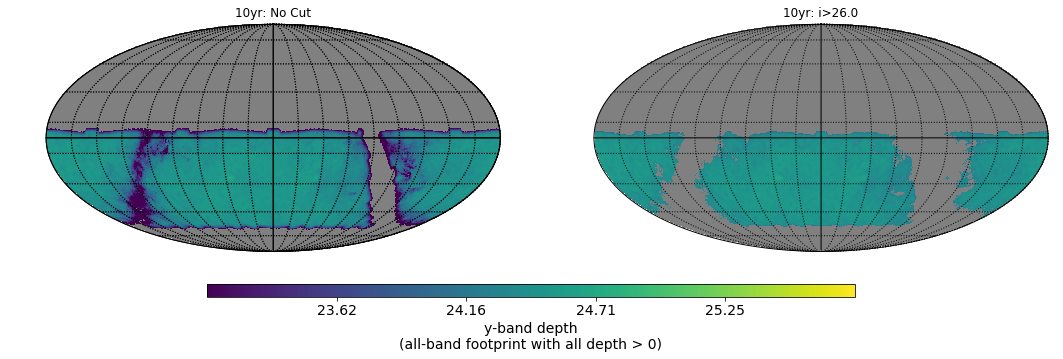

CPU times: user 46.2 s, sys: 12.9 s, total: 59.1 s
Wall time: 1min 9s


In [3]:
%%time
%run implement_depth_ebv_cuts.py --debug --mag_cuts='24.5, 24.7, 25.0, 25.3, 25.5, 26.0, 26.5'

Okay things look quite comparable to the earlier results (linked notebook above). The EBV histograms are a little different since the binning is now correctly dictated by pre-defined bins, instead of just the number of bins. As for the final numbers, we have:

#### minion_1016_sqlite_new_dithers stats: RandomDitherFieldPerVisit: final cuts: {'1yr': 24.5, '10yr': 26.0} 
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 24.09 | 25.60 | 25.80 | 25.13 | 24.13 | 23.39 
| 5$\sigma$ Depth: Std | 0.55 | 0.41 | 0.40 | 0.26 | 0.25 | 0.17 
| Area (deg2) | 12164.15 | 12164.15 | 12164.15 | 12164.15 | 12164.15 | 12164.15 

| - | 10yr_u | 10yr_g | 10yr_r | 10yr_i | 10yr_z | 10yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 25.29 | 26.84 | 27.03 | 26.35 | 25.22 | 24.47 
| 5$\sigma$ Depth: Std | 0.23 | 0.19 | 0.14 | 0.11 | 0.11 | 0.08 
| Area (deg2) | 14298.89 | 14298.89 | 14298.89 | 14298.89 | 14298.89 | 14298.89 


For DESC-SRD v1, we had:
#### Stats: i>24.5 in area common to all six bands with depths>0 in all
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 24.07 | 25.60 | 25.81 | 25.13 | 24.13 | 23.39 
| 5$\sigma$ Depth: Std | 0.53 | 0.40 | 0.38 | 0.26 | 0.24 | 0.16 
| Area (deg2) | 12275.82 | 12275.82 | 12275.82 | 12275.82 | 12275.82 | 12275.82 

#### Stats: i>26.0 in area common to all six bands with depths>0 in all
|- | 10yr_u | 10yr_g | 10yr_r | 10yr_i | 10yr_z | 10yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 25.30 | 26.84 | 27.04 | 26.35 | 25.22 | 24.47 
| 5$\sigma$ Depth: Std | 0.23 | 0.19 | 0.14 | 0.11 | 0.11 | 0.08 
| Area (deg2) | 14305.55 | 14305.55 | 14305.55 | 14305.55 | 14305.55 | 14305.55 

Things generally match - the small differences are a result of the different dither strategy between the two runs.